In [1]:
# Import pandas
import numpy as np
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import statsmodels.api as sm
import os
import copy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the data

In [2]:
# Read in dataset
banking_df = pd.read_csv(os.getcwd()+os.sep+'Churn_Modelling.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Print header
banking_df.head()
#Dimensions of the data and investigate if there are any duplicate rows
banking_df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)

In [4]:
# Print info
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Uncomment only if you have pandas profiling installed

# import pandas_profiling
# pandas_profiling.ProfileReport(banking_df)

In [6]:
# Take a look at unique values in telco
banking_df.nunique()
# Finding the null values for each column
print(banking_df.isnull().sum())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### data cleaning

In [7]:
#drop columns
banking_df = banking_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
banking_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#change data type
#banking_df = banking_df.replace({'France' : 1, 'Spain' : 2, 'Germany' : 3})
#banking_df = banking_df.replace({'Female' : 0, 'Male' : 1})
banking_df = pd.get_dummies(banking_df)
banking_df.head()
banking_df.info()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [9]:
# Get all features
features = [column_name for column_name in banking_df.columns if column_name != 'Exited']

# Get all categorical features
categorical = [column_name for column_name in features if banking_df[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]
features
categorical
numeric

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

[]

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

Identifying Outliers

In [10]:
import plotly.express as px

for feature in features:
    # df = px.data.tips()
    fig = px.box(banking_df, y=feature)
    fig.show()

<Figure size 720x360 with 0 Axes>

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



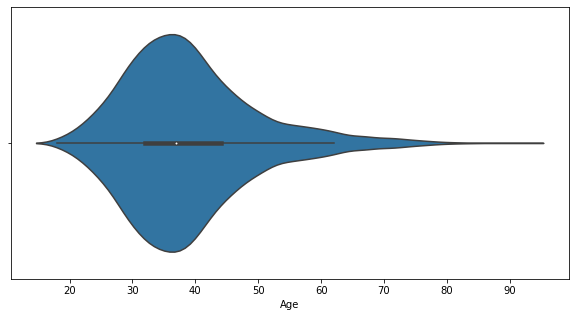

In [11]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(banking_df['Age'])
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

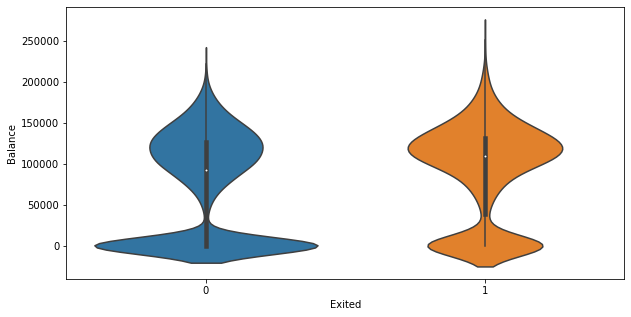

In [12]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Balance', x = 'Exited', data = banking_df)
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='Age'>

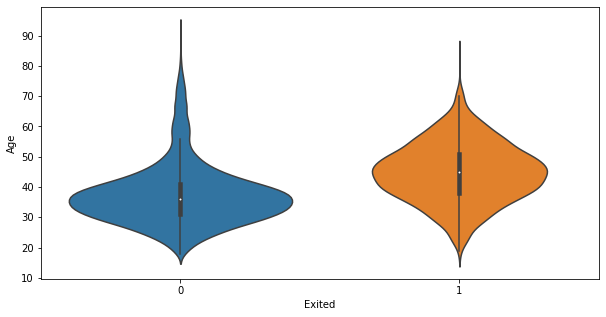

In [13]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Age', x = 'Exited', data = banking_df)
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

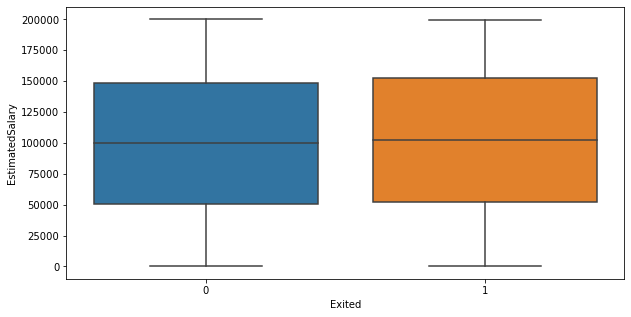

In [14]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', data = banking_df)
plt.show()

Linear regression

In [67]:
X = banking_df[features]
X =  sm.add_constant(X)
Y = banking_df['Exited']

In [68]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)

In [69]:
log_reg = sm.Logit(train_Y, train_X).fit()

         Current function value: 0.429448
         Iterations: 35


/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [70]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.1485
Time:                        15:27:13   Log-Likelihood:                -3435.6
converged:                      False   LL-Null:                       -4034.9
Covariance Type:            nonrobust   LLR p-value:                3.193e-250
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8156        nan        nan        nan         nan         nan
CreditScore          -0.0008      0.000     -2.586      0.010      -0.001      -0.000
Age                   0.

In [71]:
from statsmodels.tools.eval_measures import rmse
def get_RSME(model,test_X,test_Y):
    prediction = model.predict(test_X)
    rmse_value = rmse(test_Y, prediction)
    print('RMSE : '+str(rmse_value))
    return rmse_value

Feature Optimization with Stepwise Backward

In [72]:
#Backward Stepwise selection based on RMSE
def run_with_RMSE(data, features, target,threshold):
    X = data[features]
    Y = data[target]
    X = sm.add_constant(X)
    train_X, test_X, train_Y, test_Y = train_test_split(
        X, Y, test_size=0.20, random_state=123)
    results = sm.Logit(train_Y, train_X).fit()
    print(results.summary())
    currentRMSE = get_RSME(results, test_X, test_Y)
    pvalues = results.pvalues.iloc[1:]
    worst_pval = pvalues.max()
    if float(currentRMSE) >= float(threshold):
        worst_feature = pvalues.idxmax()
        features.remove(worst_feature)
        threshold = currentRMSE
        print(f"Removing: {pvalues.idxmax()} with p-value: {str(worst_pval)}")
        run_with_RMSE(data, features, target,threshold)
    else:
        print(f"Best features based on stepwise backward selection are: {features}")
        print(f"Best RMSE: {currentRMSE}")

In [73]:
model_features = copy.deepcopy(features)
run_with_RMSE(banking_df,model_features,'Exited',get_RSME(log_reg,test_X,test_Y))

RMSE : 0.36737876076846826
         Current function value: 0.429448
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.1485
Time:                        15:27:35   Log-Likelihood:                -3435.6
converged:                      False   LL-Null:                       -4034.9
Covariance Type:            nonrobust   LLR p-value:                3.193e-250
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8156        nan        nan        nan         nan         nan
CreditScore      

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE : 0.36743259729247946
Removing: Gender_Female with p-value: 0.9999996553171824
Optimization terminated successfully.
         Current function value: 0.429485
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.1485
Time:                        15:27:35   Log-Likelihood:                -3435.9
converged:                       True   LL-Null:                       -4034.9
Covariance Type:            nonrobust   LLR p-value:                3.211e-252
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

Decision Tree

In [35]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
X = banking_df[features]
Y = banking_df['Exited']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)
treemodel =DecisionTreeClassifier(max_depth=3)
treemodel.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=3)

<Figure size 1800x1440 with 0 Axes>

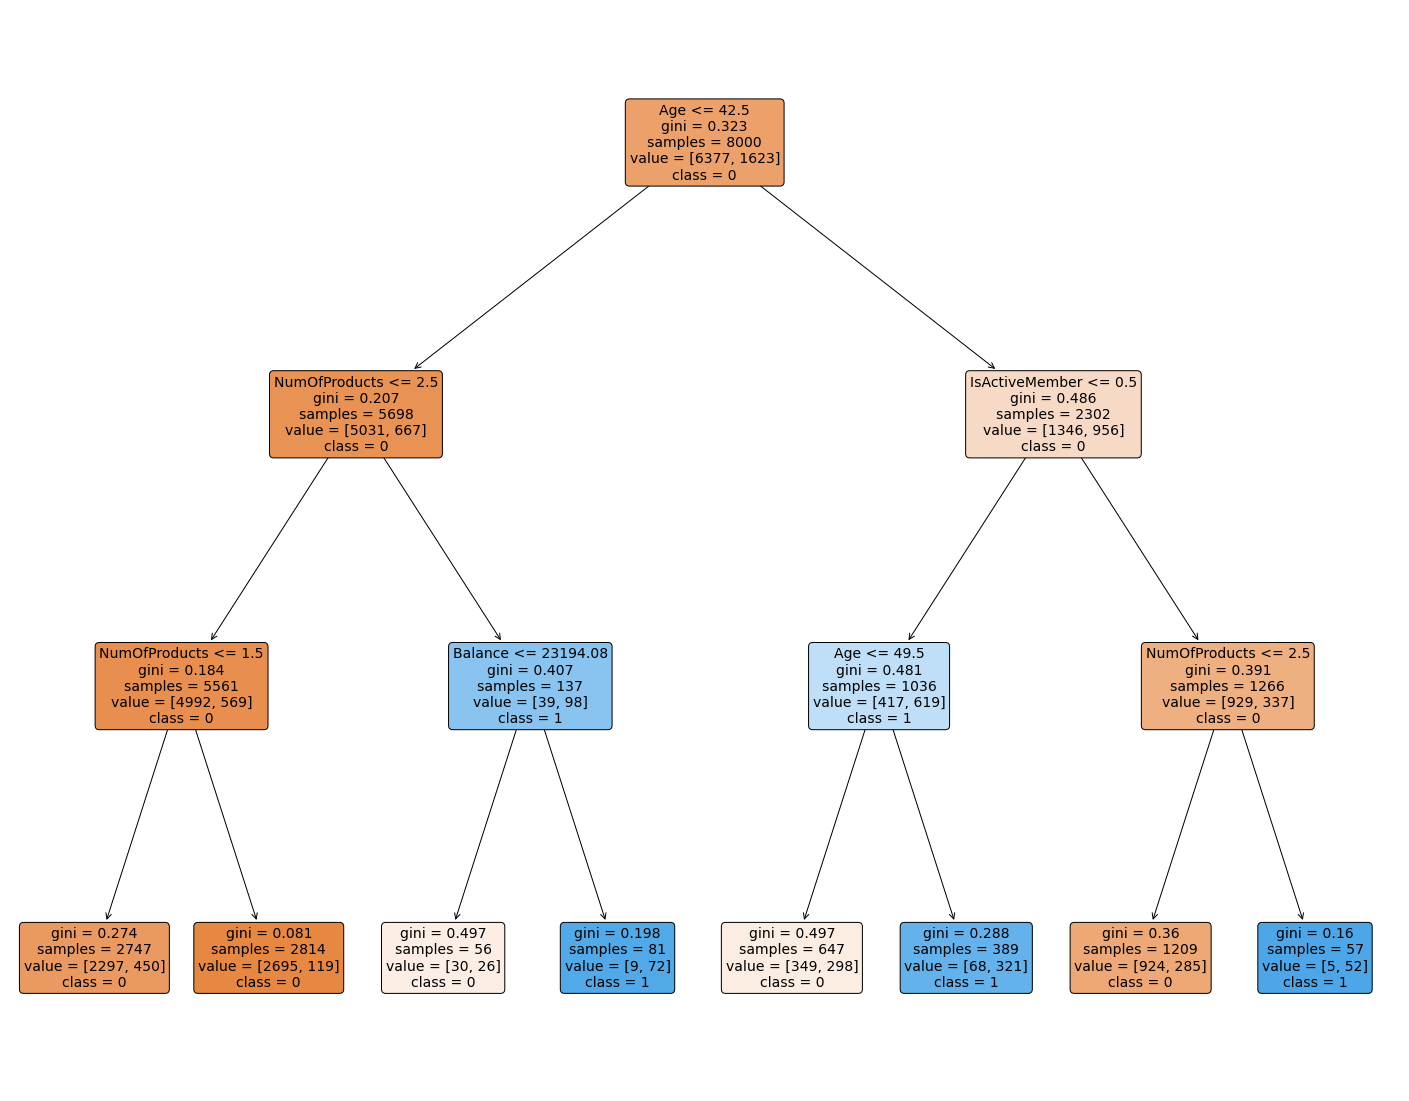

In [36]:
from sklearn import tree
plt.figure(figsize=(25,20))
plot=tree.plot_tree(treemodel, feature_names=X.columns.values.tolist(),class_names=['0','1'], filled=True, rounded=True,fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.52035
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01744
Feature: 4, Score: 0.27953
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.18268
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000


<BarContainer object of 13 artists>

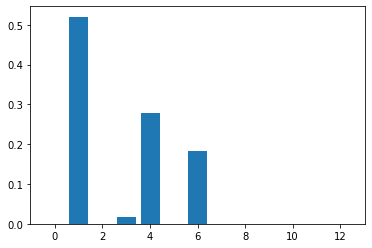

In [37]:
importance = treemodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [38]:
#Decission Tree Classifier Score
#treepredict = treemodel.predict(test_X)
score = treemodel.score(test_X, test_Y)
print("Decision Tree Accuracy: ", score)

Decision Tree Accuracy:  0.837


In [39]:
dt_prediction=treemodel.predict(test_X)
RMSE_DT = sklearn.metrics.mean_squared_error(test_Y, dt_prediction)**0.5
print("Decision Tree RMSE: ",RMSE_DT)

Decision Tree RMSE:  0.403732584763727


In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X.values,train_Y.values)
xgb_prediction = xgb.predict(test_X.values)
print("XGBoost MSE: ",sklearn.metrics.mean_squared_error(test_Y,xgb_prediction))

XGBClassifier()

XGBoost MSE:  0.1355


Feature: 0, Score: 0.02442
Feature: 1, Score: 0.20806
Feature: 2, Score: 0.03347
Feature: 3, Score: 0.06535
Feature: 4, Score: 0.17401
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.24422
Feature: 7, Score: 0.02330
Feature: 8, Score: 0.03134
Feature: 9, Score: 0.10684
Feature: 10, Score: 0.01730
Feature: 11, Score: 0.07169
Feature: 12, Score: 0.00000


<BarContainer object of 13 artists>

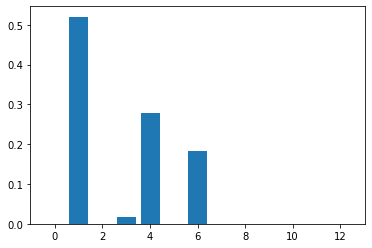

In [41]:
xgb_importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(xgb_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(xgb_importance))], importance)
plt.show()

Comparing the Models

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Mean Squared Error')

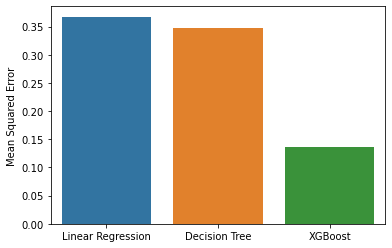

In [74]:
i = ['Linear Regression', 'Decision Tree', 'XGBoost']
j = [0.3674, 0.3481, 0.137]

sns.barplot(i, j).set_ylabel('Mean Squared Error')
plt.show()

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Time taken in seconds')

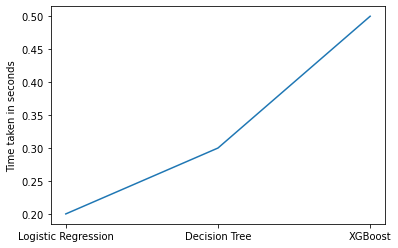

In [43]:
x = ['Logistic Regression', 'Decision Tree', 'XGBoost']
y = [0.2, 0.3, 0.5]

sns.lineplot(x, y).set_ylabel('Time taken in seconds')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y, dt_prediction, normalize=True)

0.837

In [47]:
accuracy_score(test_Y, xgb_prediction, normalize=True)

0.8645

In [63]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
X = banking_df[model_features]
Y = banking_df['Exited']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)
logisticRegr.fit(train_X, train_Y)
predictions = logisticRegr.predict(test_X)
accuracy_score(test_Y, predictions, normalize=True)



LogisticRegression()

0.783

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Accuracy')

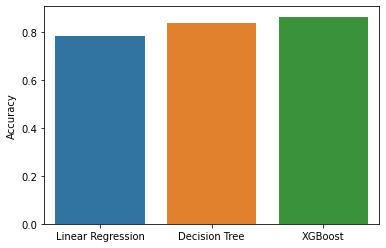

In [65]:
i = ['Linear Regression', 'Decision Tree', 'XGBoost']
j = [0.783, 0.837, 0.864]

sns.barplot(i, j).set_ylabel('Accuracy')
plt.show()